<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/mini_labs/week_5_bayes.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# BYU CS 473 — Bayes Law and the Beta-Binomial model

In this assignment, you will learn more intuition for priors, posteriors, and the role that data plays in our inferences about a latent hypothesis.

---

## Learning Goals
- Understand priors and posteriors
- Understand the beta-binomial model
- Understand how data eventually overwhelms the prior


## 1. Exploring the beta prior

The beta distribution is a continuous distribution over the interval [0,1].  Because this is exactly the domain of a single probability (such as the probability that a coin will come up heads), it can be used as a prior distribution over an unknown parameter.  To start, let's plot it for various values of its two parameters, which we will call (a) and (b).

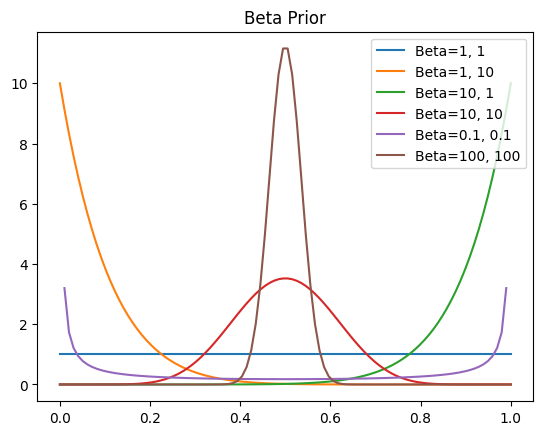

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import beta

# Test various values of alpha and beta
parameter_values = [
    (1, 1),
    (1, 10),
    (10, 1),
    (10, 10),
    (0.1, 0.1),
    (100,100)
]

xvals = np.linspace(0, 1, 100)

# Plot the beta prior for each value of beta
for a, b in parameter_values:
    yvals = beta.pdf( xvals, a, b )
    plt.plot(xvals, yvals, label=f"Beta={a}, {b}" )

plt.legend()
plt.title("Beta Prior")
plt.show()


### Reflection
- Consider the beta distribution defined by each setting of the parameters (a) and (b). Which is the most uniform? Which is the most confident? Which is binary?


The beta prior is the most uniform is Beta(1, 1) due to flat line and it assign equal probabiltiy based on the bias of the coin flip. Beta(100,100) is most confident because of the narrow strutucture in normal distribution and states coin is fairer. Beta(0.1,0.1) is binary and states coin has bias towords tail or head.


## 2. Calculating the posterior

Given a prior defined by parameters (a) and (b), and some data, we'd now like to calculate (and visualize) the posterior distribution.


### Exercise 2

Suppose we have a coin that is weighted, but we don't know the weight. Call the unknown weight $\theta$.

Suppose now we flip the coin 10 times, and we see "HHTTHTHHHH".

Your task is to visualize how that data would affect our belief about $\theta$, given an initial belief about $\theta$.

To do this, you must do the following:

- For each of the prior parameter values in the list of parameter values from Part 1, calculate the posterior distribution $p(\theta|data)$
- Create a new figure for each setting of the prior parameter values.
- Plot the prior distribution, and the corresponding posterior, on the same figure.  (When you're done, you should have six figures, each with two plots)

In [3]:
data = "HHTTHTHHHH"
H = data.count('H')
T = data.count('T')

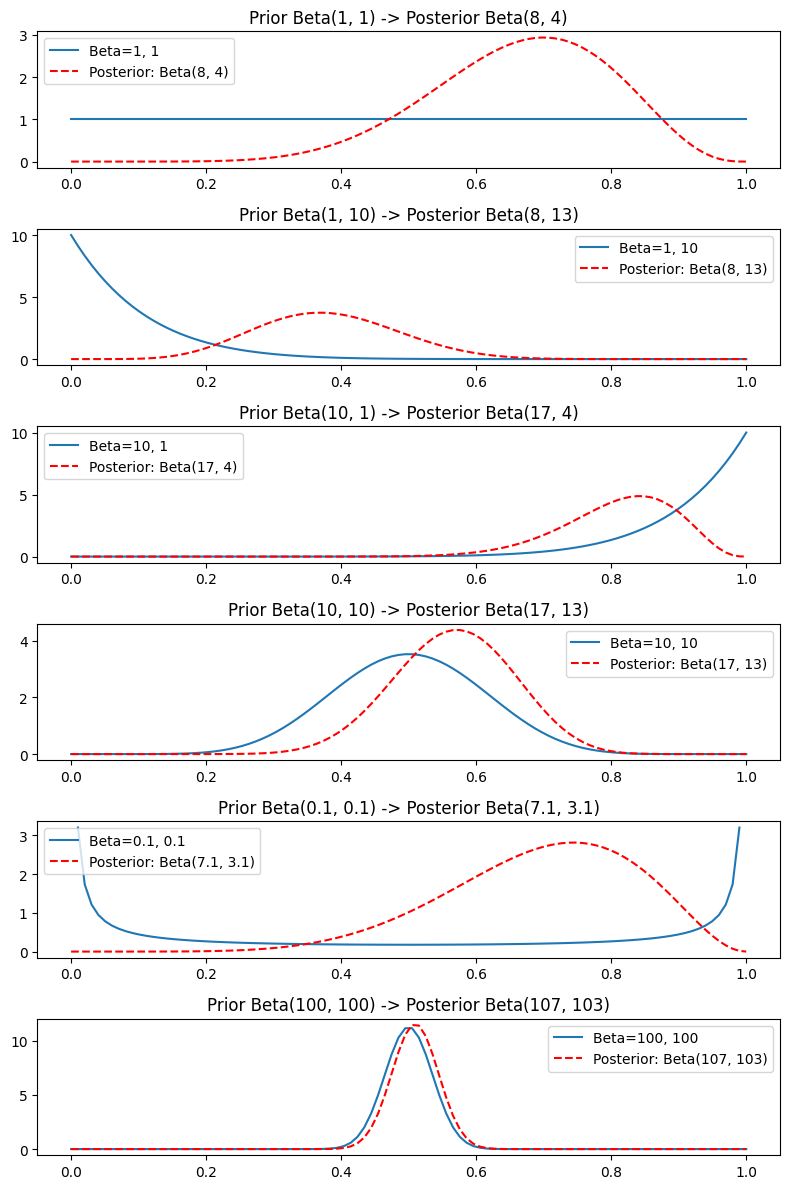

In [6]:
plt.figure(figsize=(8, 12))

# Plot the beta prior for each value of beta
plt_index = 0

for a, b in parameter_values:
    plt_index += 1
    plt.subplot( 6, 1, plt_index )
    plt.title( f"Beta={a}, {b}" )


    yvals = beta.pdf( xvals, a, b )
    plt.plot(xvals, yvals, label=f"Beta={a}, {b}" )

    # now calculate the posterior, and plot it
    # XXX your code here
    a_post = a + H
    b_post = b + T
    yvals_posterior = beta.pdf(xvals, a_post, b_post)
    plt.plot(xvals, yvals_posterior, label=f"Posterior: Beta({a_post}, {b_post})", color='red', linestyle='--')

    plt.title(f"Prior Beta({a}, {b}) -> Posterior Beta({a_post}, {b_post})")
    plt.legend()
plt.tight_layout()
plt.show()


## 3. Reflection

### Exercise 3
Answer in 2–3 sentences each:

1. Which prior was the "strongest" (ie, changed the least in response to seeing new data)? Which was the "weakest"?
2. Suppose you wanted to create a prior that was very confident about the value of $\theta$. How would you do that?
3. What would an "infinitely strong" prior look like?


(Your response here)
1. The strongest prior was $ Beta(100, 100) $ because it has largest count in the flips and which allows strong belief. and the The weakest prior was $ Beta(1, 1) $ because it is uniformly distributed.
2. For a confident prior, we should use larger values for the parameter $a,b$ and will be determined by its ratio. example: $Beta(800,200)$ gives values close to 0.8 probability.
3. if we set up $a, b$ to infinity, the graph looks like very tall and narrow. this kind of prior is absolute and will not be changed with new data.